## Pre-processing batches of low-resolution images for 3D model training

In [65]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from shutil import copy2

In [60]:
# Path to data

img_path = 'E:\\Datasets\\3DFaces\\300W-3D-ALL\\images'
mat_path = 'E:\\Datasets\\3DFaces\\300W-3D-ALL\\3d-scans'

destin_img_path = 'E:\\Datasets\\3DFaces\\300W-3D-ALL\\3d-images-low-res'
destin_mat_path = 'E:\\Datasets\\3DFaces\\300W-3D-ALL\\3d-scan-low-res'

def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

In [61]:
# Creating directories

if not os.path.exists(destin_img_path):
    os.mkdir(destin_img_path)

if not os.path.exists(destin_mat_path):
    os.mkdir(destin_mat_path)

In [63]:
# Processing all images

for i in os.listdir(img_path):
        
    img_ref = load_image(os.path.join(img_path, i))    
    shape1,shape2 = img_ref.shape[0],img_ref.shape[1]
    resized_img = cv2.resize(img_ref, (32, 32), interpolation=cv2.INTER_AREA)
    resized_img = cv2.resize(resized_img, (shape1,shape2), interpolation=cv2.INTER_LINEAR)

    img_name_low = os.path.splitext(i)[0] + '_low' + os.path.splitext(i)[1]
    
    # Write to folder original and lossy version
    cv2.imwrite(os.path.join(destin_img_path, img_name_low), resized_img[...,::-1])
    cv2.imwrite(os.path.join(destin_img_path, i), img_ref[...,::-1])

    #break

In [66]:
# Processing all volume values (basically just copying it with a different name for a different directory)

for i in os.listdir(mat_path):
    
    volume_name_low = os.path.splitext(i)[0] + '_low' + os.path.splitext(i)[1]
    
    # Copy original file
    copy2(os.path.join(mat_path, i), os.path.join(destin_mat_path, i))
    
    # Rename it
    os.rename(os.path.join(destin_mat_path, i), os.path.join(destin_mat_path, volume_name_low))
    
    # Keep file with original name also inside the path
    copy2(os.path.join(mat_path, i), os.path.join(destin_mat_path, i))
    
    #break

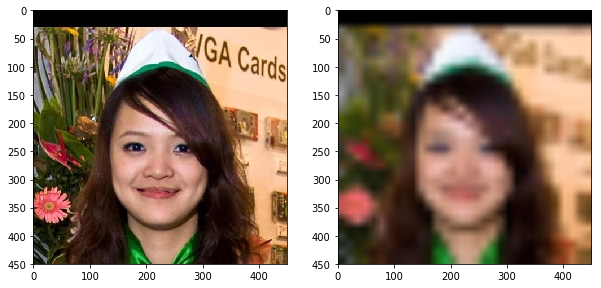

In [64]:
ref = 'E:\\Datasets\\3DFaces\\300W-3D-ALL\\images-low-res\\AFW_1051618982_1.jpg'
low = 'E:\\Datasets\\3DFaces\\300W-3D-ALL\\images-low-res\\AFW_1051618982_1_low.jpg'

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(load_image(ref))
plt.subplot(1,2,2)
plt.imshow(load_image(low))
plt.show()